In [1]:
### This notebook contains the code that will load the pre-trained weights for the emotion detector model available in the deepface package
#### Author: Hugo Albuquerque Cosme da Silva
#### Creation date: 2023-12-24

# Imports

In [1]:
import os
import gdown
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout
import cv2


2023-12-31 21:18:30.640725: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-31 21:18:30.676457: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-31 21:18:30.676490: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-31 21:18:30.677480: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-31 21:18:30.682663: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-31 21:18:30.683273: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
# Labels for the emotions that can be detected by the model.
labels = ["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"]

In [3]:
def loadModel(
    url="https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5",
) -> Sequential:

    num_classes = 7

    model = Sequential()

    # 1st convolution layer
    model.add(Conv2D(64, (5, 5), activation="relu", input_shape=(48, 48, 1)))
    model.add(MaxPooling2D(pool_size=(5, 5), strides=(2, 2)))

    # 2nd convolution layer
    model.add(Conv2D(64, (3, 3), activation="relu"))
    model.add(Conv2D(64, (3, 3), activation="relu"))
    model.add(AveragePooling2D(pool_size=(3, 3), strides=(2, 2)))

    # 3rd convolution layer
    model.add(Conv2D(128, (3, 3), activation="relu"))
    model.add(Conv2D(128, (3, 3), activation="relu"))
    model.add(AveragePooling2D(pool_size=(3, 3), strides=(2, 2)))

    model.add(Flatten())

    # fully connected neural networks
    model.add(Dense(1024, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation="relu"))
    model.add(Dropout(0.2))

    model.add(Dense(num_classes, activation="softmax"))

    # --------------------------

    # load weights
    output = "/home/hualcosa/Documents/iu_project_edge_ai/project_files/artifacts/model_weights/emotion_model_weights.h5"
    if os.path.isfile(output) != True:
        gdown.download(url, output, quiet=False)

    model.load_weights(output)

    return model
    

# Loading the model

In [4]:
model = loadModel()

Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /home/hualcosa/Documents/iu_project_edge_ai/project_files/artifacts/model_weights/emotion_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 20.8MB/s]


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 44, 44, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2  (None, 20, 20, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 18, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 average_pooling2d (Average  (None, 7, 7, 64)          0         
 Pooling2D)                                                      
                                                                 
 conv2d_3 (Conv2D)           (None, 5, 5, 128)         7

# testing the model

I have downloaded the FER-2013 dataset from kaggle and now I will try to see if the model is making reasonable predicions.<br>
link to download the dataset: https://www.kaggle.com/datasets/msambare/fer2013

In [15]:
# collecting files from the emotion dataset
happy_images = os.listdir('/home/hualcosa/Documents/iu_project_edge_ai/project_files/data/test/happy')
sad_images = os.listdir('/home/hualcosa/Documents/iu_project_edge_ai/project_files/data/test/sad')
base_path= '/home/hualcosa/Documents/iu_project_edge_ai/project_files/data/test/'


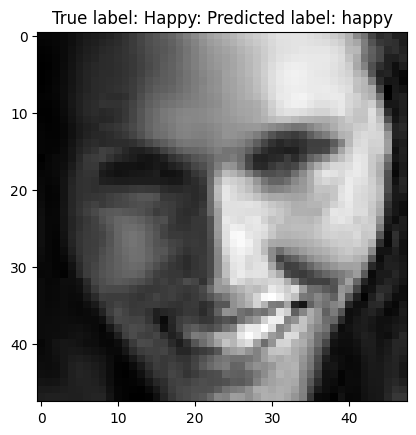

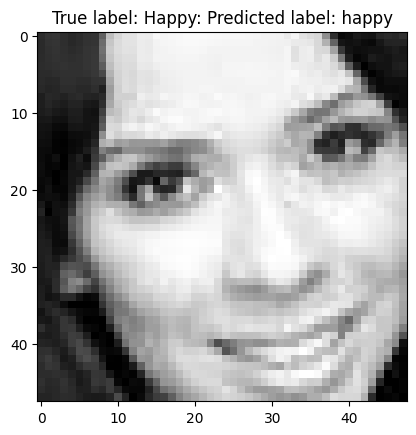

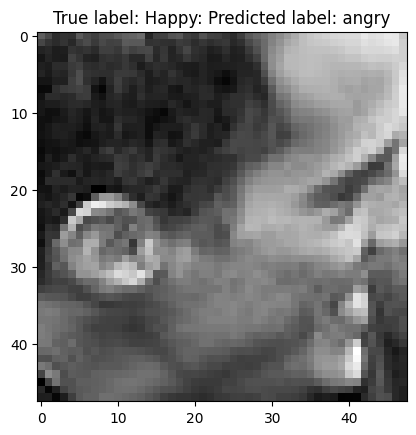

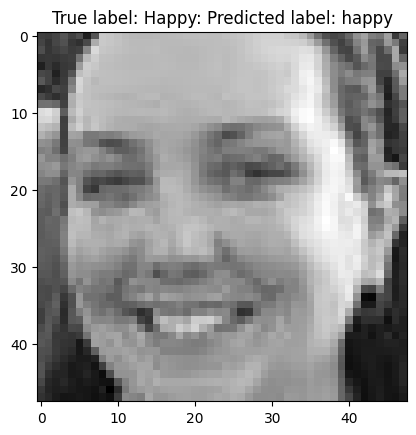

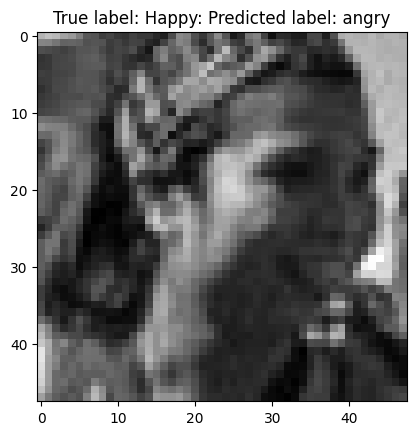

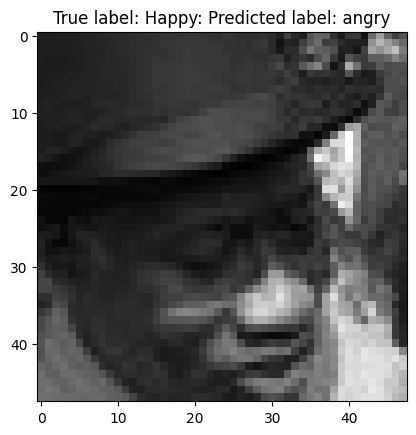

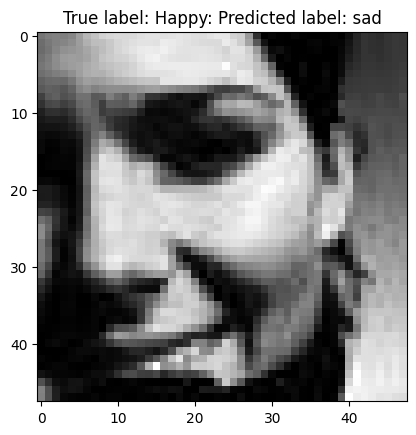

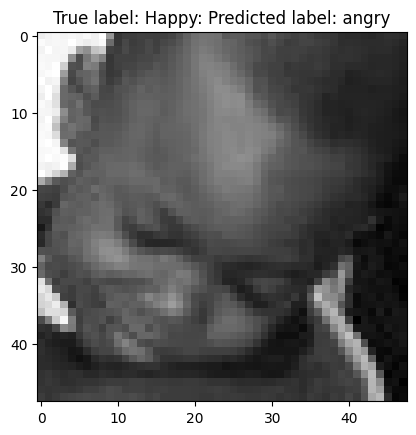

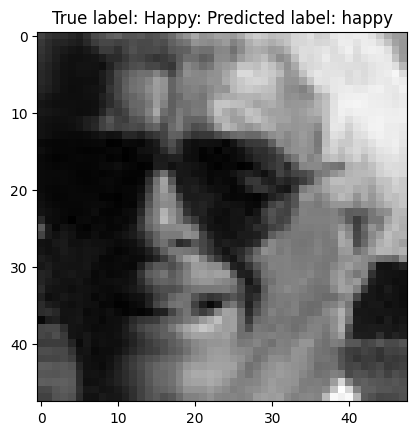

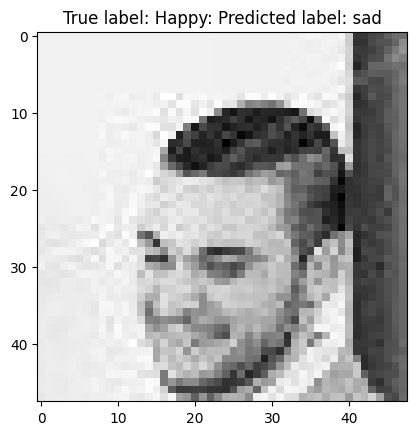

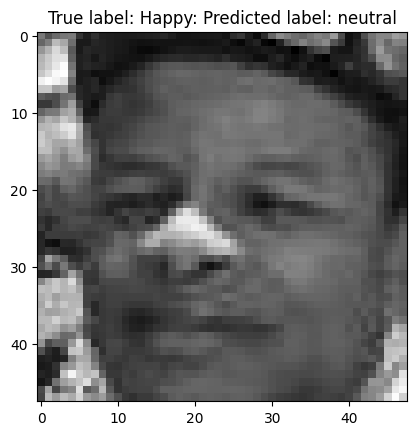

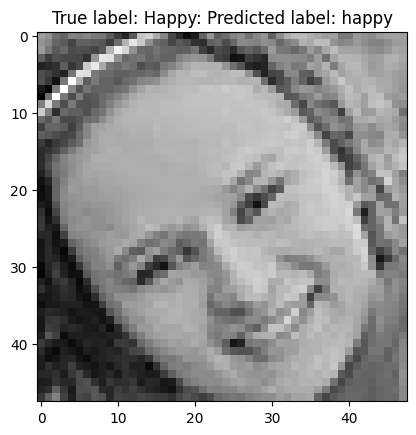

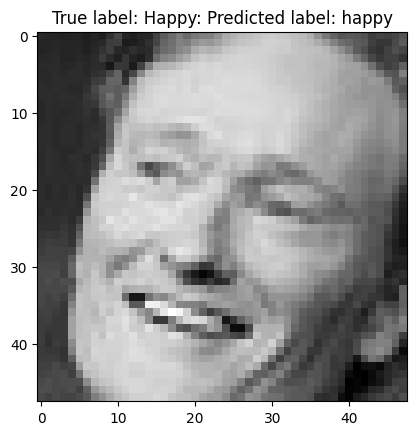

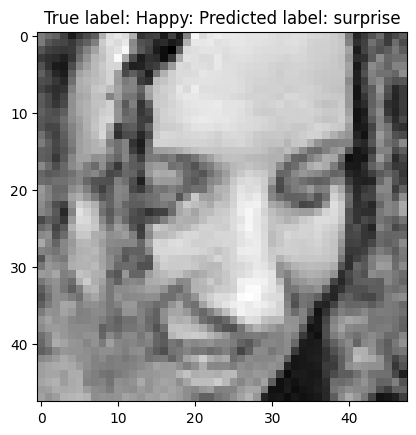

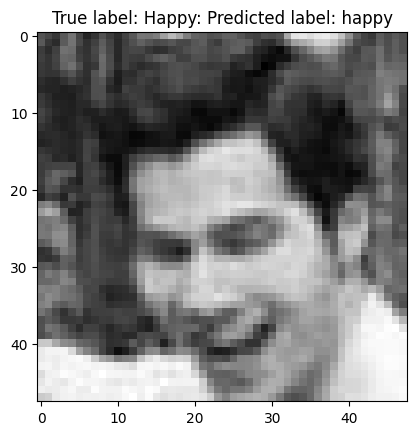

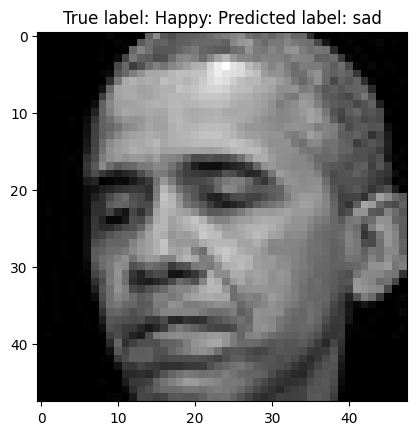

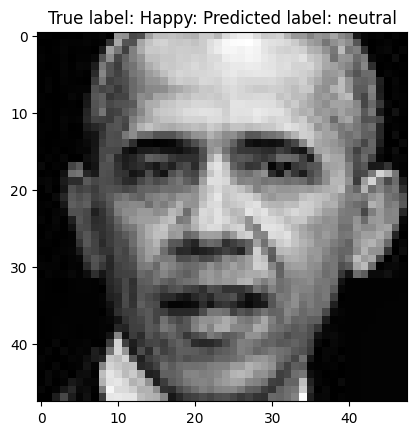

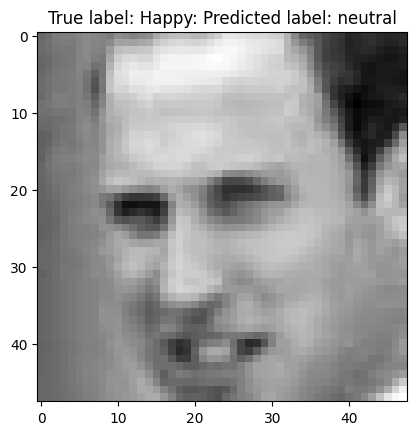

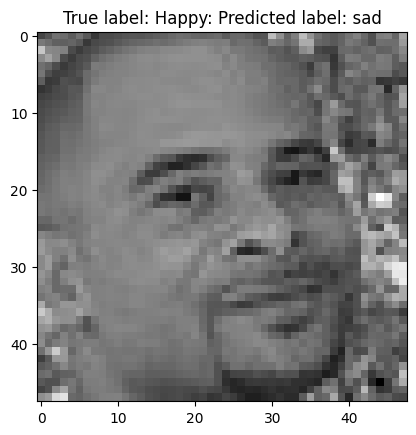

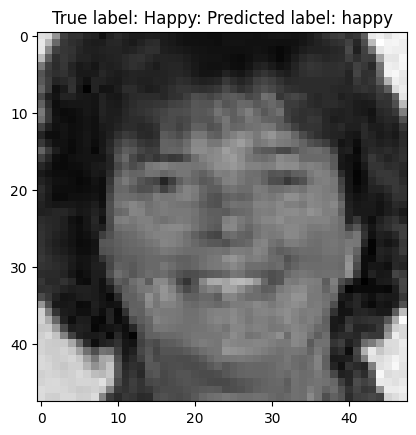

In [16]:
# testing model performance on 20 random happy images
for _ in range(20):
    file_path = os.path.join(base_path,'happy', random.choice(happy_images))
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    img_copy = img.copy()
    # adding batch dimension
    img = np.expand_dims(img, axis=0)
    # performing inference
    predicted_label = labels[model.predict(img, verbose=0).argmax()]
    plt.imshow(img_copy, cmap='gray')
    plt.title(f"True label: Happy: Predicted label: {predicted_label}")
    plt.show()

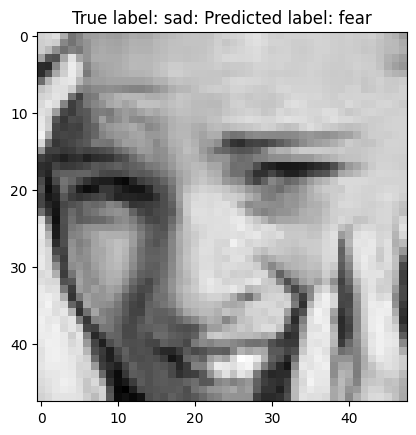

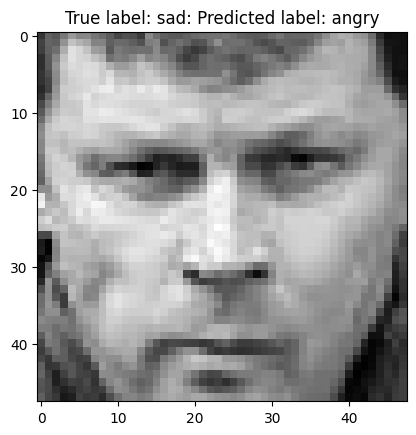

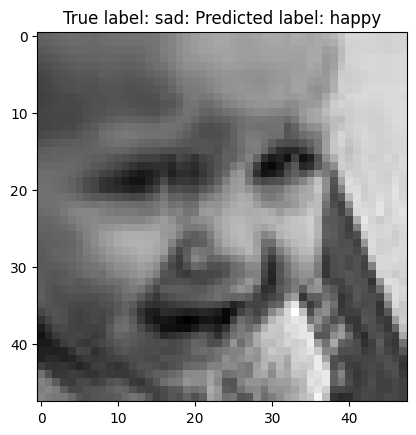

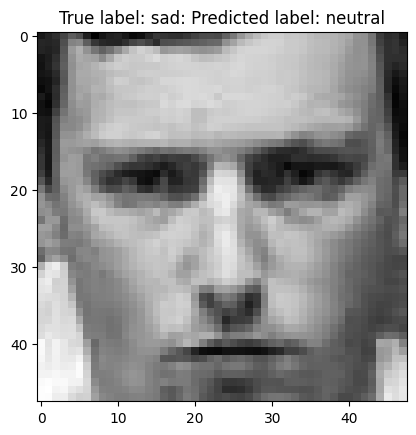

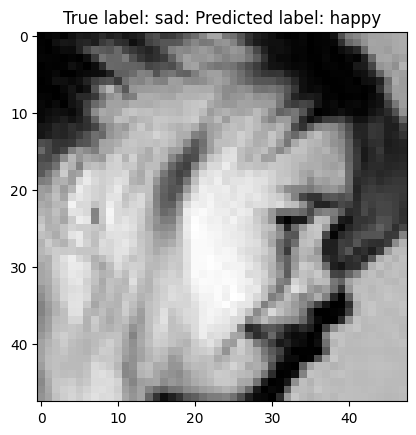

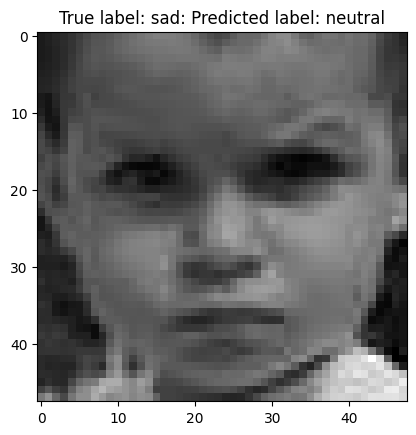

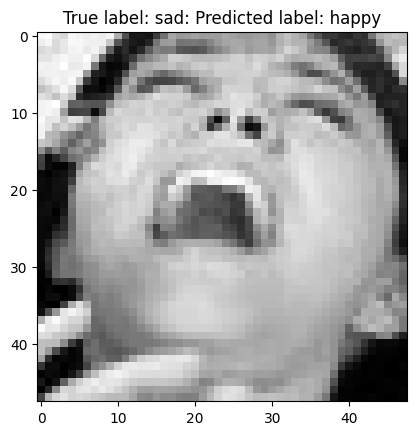

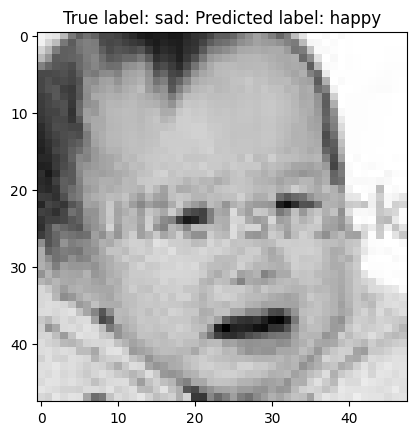

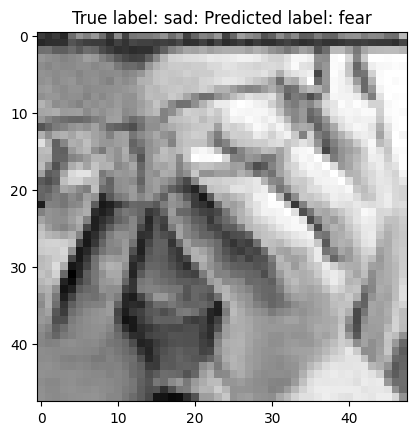

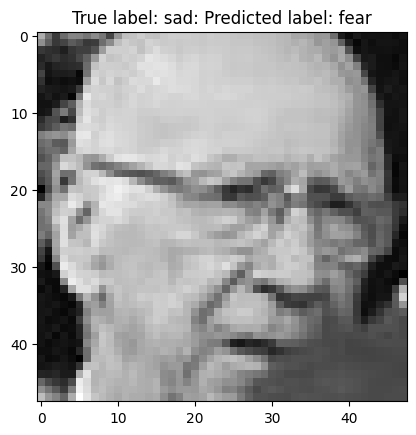

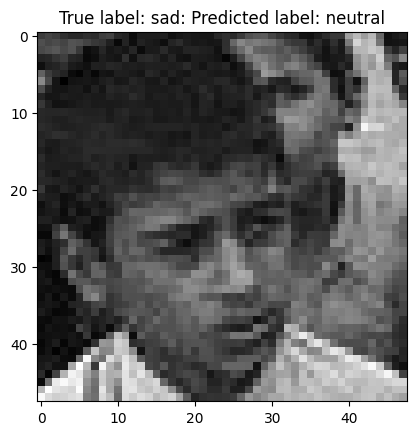

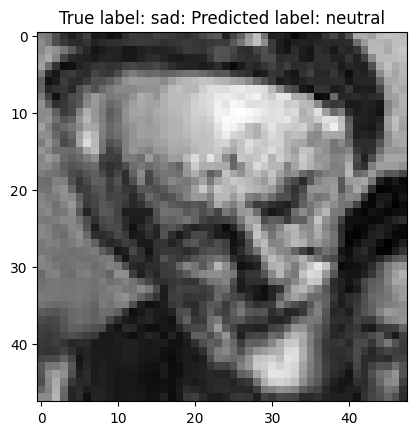

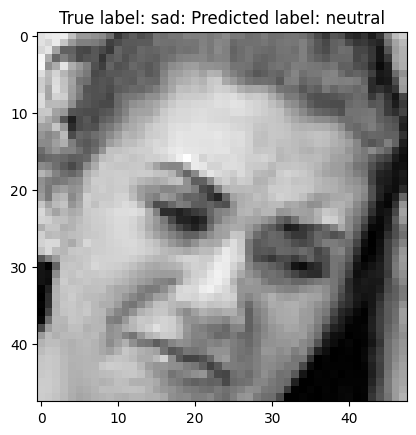

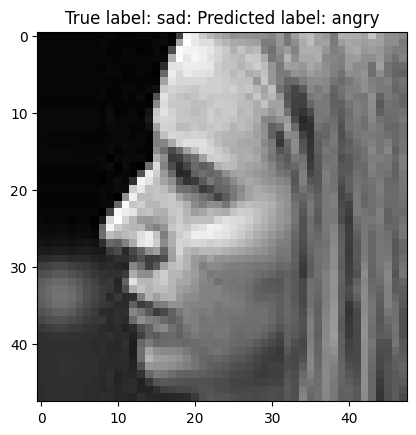

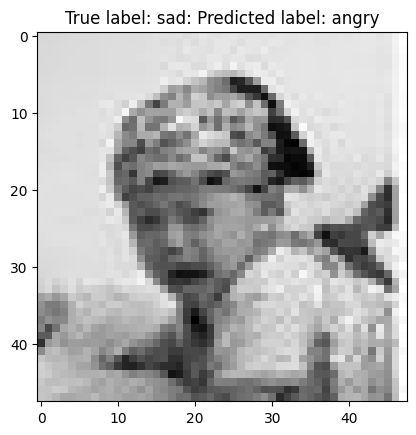

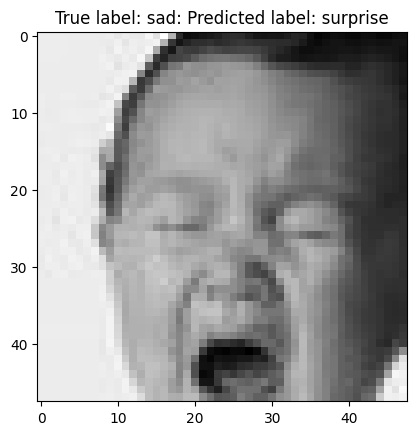

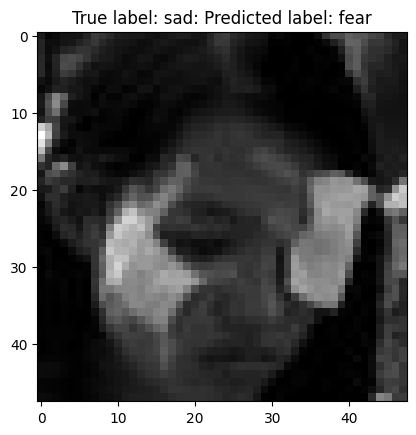

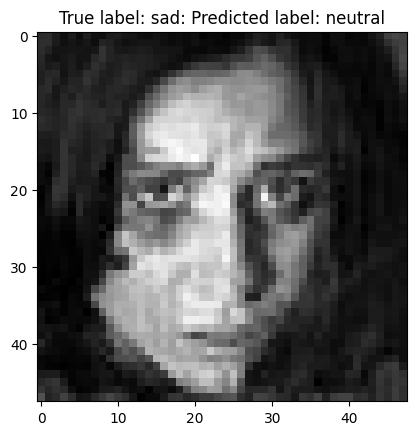

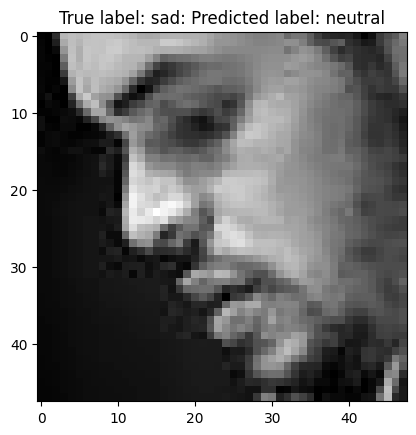

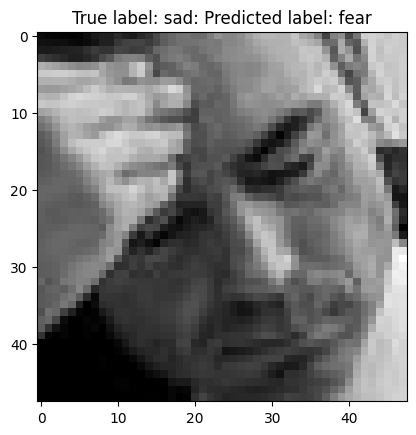

In [17]:
# testing model performance on 20 random sad images
for _ in range(20):
    file_path = os.path.join(base_path,'sad', random.choice(sad_images))
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    img_copy = img.copy()
    # adding batch dimension
    img = np.expand_dims(img, axis=0)
    # performing inference
    predicted_label = labels[model.predict(img, verbose=0).argmax()]
    plt.imshow(img_copy, cmap='gray')
    plt.title(f"True label: sad: Predicted label: {predicted_label}")
    plt.show()

# Saving model

In [7]:
tf.saved_model.save(model, export_dir="/home/hualcosa/Documents/iu_project_edge_ai/project_files/artifacts/models/emotion")

INFO:tensorflow:Assets written to: /home/hualcosa/Documents/iu_project_edge_ai/project_files/artifacts/models/emotion/assets


INFO:tensorflow:Assets written to: /home/hualcosa/Documents/iu_project_edge_ai/project_files/artifacts/models/emotion/assets


# Evaluating the performance in the evaluation images
In this section I will evaluate the performance of the saved model(BEFORE CONVERTION TO TF-LITE format) on a test-set of 20 images. These images that will also be used to evaluate the perfomance of the deployed models in the Android application

In [6]:
img_paths = '/home/hualcosa/Documents/iu_project_edge_ai/evaluation_images'
img_paths = [os.path.join(img_paths, i) for i in os.listdir(img_paths)]

In [11]:
# This list is going to store the comparison between true class vs predicted class.
evals = []
for path in img_paths:
    # retrieving the original names from the file names:
    age_label, gender_label, emotion_label, _ = path.split('/')[-1].split("_")
    # read image
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_orig = img.copy() 
    # the model expects data in float32 format
    img = img.astype('float32')
    img_emotion = cv2.resize(img, (48,48))
    img_emotion = cv2.cvtColor(img_emotion, cv2.COLOR_RGB2GRAY)
    img_emotion = img_emotion.reshape(1, 48,48, 1) / 255 # normalizing the img

    predicted_label = labels[model.predict(img_emotion, verbose=0).argmax()] 
    evals.append(int(emotion_label == predicted_label))

In [12]:
print(f"The original model accuracy is: {100 * sum(evals)/ len(evals)} %")

The original model accuracy is: 29.166666666666668 %
